In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import time
import os
import re
import fileinput
import math    
from math import pi

In [14]:
# datasets analisados - 2016 e 2017
dataSet2016 = pd.read_csv("csv/OB_DATA_2016.csv",sep=",",low_memory=False)
dataSet2017 = pd.read_csv("csv/OB_DATA_2017.csv",sep=",",low_memory=False)

# informaçoes de cidades
cidadesBR = pd.read_csv("csv/muniBR-ALL2.csv",delimiter=',')

1562409

In [121]:
# Verificacao de obitos causados por asma como causa base
onlyAsma2016 = dataSet2016[dataSet2016['CAUSABAS'].str.contains('J45')]#CID ASMA
onlyAsma2017 = dataSet2017[dataSet2017['CAUSABAS'].str.contains('J45')]#CID ASMA

# Verificacao de ASMA como doença listada nas causas
alsoAsma2016 = dataSet2016[dataSet2016['LINHAA'].str.contains('J45')| dataSet2016['LINHAB'].str.contains('J45')| dataSet2016['LINHAC'].str.contains('J45')| dataSet2016['LINHAD'].str.contains('J45') | dataSet2016['LINHAII'].str.contains('J45')]
alsoAsma2017 = dataSet2017[dataSet2017['LINHAA'].str.contains('J45')| dataSet2017['LINHAB'].str.contains('J45')| dataSet2017['LINHAC'].str.contains('J45')| dataSet2017['LINHAD'].str.contains('J45') | dataSet2017['LINHAII'].str.contains('J45')]

# Dicionario de variaveis em http://tabnet.datasus.gov.br/cgi/sih/nrdescr.htm

In [122]:
onlyAsma2016

,TIPOBITO,DTOBITO,HORAOBITO,NUMSUS,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS
3796,2,1012016,1200.0,NaN,822.0,221100.0,5061950.0,465,2,1.0,...,1.0,NaN,NaN,2.0,*A419,*J969,*J189,*J459,*C56X*J980,J459
4253,2,16012016,1100.0,NaN,821.0,211130.0,7041928.0,487,2,1.0,...,1.0,NaN,NaN,2.0,*A419,*J960,*J459,NaN,NaN,J459
4383,2,20012016,2215.0,NaN,835.0,351620.0,27011953.0,462,2,4.0,...,NaN,NaN,NaN,NaN,*R578,*A419,*J189,NaN,*N179*J459*I10X*F171,J459
4654,2,27012016,900.0,898002232677216.0,824.0,240800.0,22031939.0,476,2,1.0,...,1.0,NaN,NaN,2.0,*J960,*A419,*J189,*J459,*M609*E149,J459
4687,2,28012016,220.0,NaN,190.0,NaN,11011918.0,498,2,1.0,...,1.0,NaN,NaN,2.0,*A419,*J159,*J459,NaN,*D649,J459
4977,2,6022016,1510.0,NaN,853.0,530010.0,8041989.0,426,1,1.0,...,NaN,NaN,NaN,1.0,*J969,*J81X,*J459,NaN,NaN,J459
5953,2,8032016,930.0,NaN,833.0,330455.0,11031925.0,490,2,1.0,...,1.0,NaN,NaN,2.0,*A419,*J189,*J069,*J459,*I10X*B909,J459
6376,2,21032016,2134.0,NaN,833.0,330455.0,10111940.0,475,2,2.0,...,1.0,NaN,NaN,2.0,*A419,*J189,*J459,NaN,*I499*E039,J459
6646,2,29032016,15.0,NaN,853.0,530010.0,22051975.0,440,1,4.0,...,NaN,NaN,NaN,NaN,*J960,*R570,NaN,NaN,*J459,J459
7384,2,19042016,1115.0,NaN,852.0,521730.0,4091951.0,464,2,4.0,...,1.0,NaN,NaN,2.0,*J969,NaN,*J459,NaN,*Q909*U049,J459


In [123]:
alsoAsma2016

,TIPOBITO,DTOBITO,HORAOBITO,NUMSUS,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS
709,2,13032016,2140.0,NaN,812.0,120050.0,14101923.0,492,2,4.0,...,NaN,NaN,NaN,NaN,*J459,*J189,*A310,NaN,NaN,A310
2863,2,8102016,30.0,706203538898162.0,812.0,120050.0,7011967.0,449,2,4.0,...,NaN,NaN,NaN,NaN,*I469,*J459,*I10X,*J449,NaN,J448
3796,2,1012016,1200.0,NaN,822.0,221100.0,5061950.0,465,2,1.0,...,1.0,NaN,NaN,2.0,*A419,*J969,*J189,*J459,*C56X*J980,J459
4253,2,16012016,1100.0,NaN,821.0,211130.0,7041928.0,487,2,1.0,...,1.0,NaN,NaN,2.0,*A419,*J960,*J459,NaN,NaN,J459
4343,2,19012016,2255.0,NaN,823.0,231080.0,28091927.0,488,1,1.0,...,1.0,NaN,NaN,2.0,*A419,*N390,*N19X,*N40X,*J449*J459,N40
4383,2,20012016,2215.0,NaN,835.0,351620.0,27011953.0,462,2,4.0,...,NaN,NaN,NaN,NaN,*R578,*A419,*J189,NaN,*N179*J459*I10X*F171,J459
4564,2,25012016,330.0,NaN,826.0,260410.0,22051934.0,481,1,4.0,...,NaN,NaN,NaN,NaN,*J960,*J159,*J449,NaN,*J459,J440
4654,2,27012016,900.0,898002232677216.0,824.0,240800.0,22031939.0,476,2,1.0,...,1.0,NaN,NaN,2.0,*J960,*A419,*J189,*J459,*M609*E149,J459
4687,2,28012016,220.0,NaN,190.0,NaN,11011918.0,498,2,1.0,...,1.0,NaN,NaN,2.0,*A419,*J159,*J459,NaN,*D649,J459
4977,2,6022016,1510.0,NaN,853.0,530010.0,8041989.0,426,1,1.0,...,NaN,NaN,NaN,1.0,*J969,*J81X,*J459,NaN,NaN,J459


In [124]:
# Concatena os datasets de 2016 e 2017
onlyAsma = pd.concat([onlyAsma2016,onlyAsma2017])
alsoAsma = pd.concat([alsoAsma2016,alsoAsma2017])

In [125]:
# UFs por cidade
onlyAsma['CODUF'] = (onlyAsma['CODMUNRES']/10000).astype(int)
alsoAsma['CODUF'] = (alsoAsma['CODMUNRES']/10000).astype(int)

In [126]:
# regioes por estado
onlyAsma['CODREG'] = np.floor(round(onlyAsma['CODUF']/10,1)).astype(int)
alsoAsma['CODREG'] = np.floor(round(alsoAsma['CODUF']/10,1)).astype(int)

In [ ]:
onlyAsmafilter

In [25]:
cidadesBR['CODREG']=np.floor(round(cidadesBR['CodUF']/10,1)).astype(int)

80364410

In [127]:
# Contabilizacao de mortes de asma como causa primaria - regiao
obREGs = onlyAsma['CODREG'].value_counts()

# Contabilizacao de mortes com asma como uma das causas - regiao
obAlsoAsmaREGs = alsoAsma['CODREG'].value_counts()

In [106]:
obAlsoAsmaREGs

3    3014
2    1877
4    1328
5     465
1     325
Name: CODREG, dtype: int64

In [128]:
propOB = []
for i in range (1,6):
    propOB.append(float(obREGs[i])/float(cidadesBR[cidadesBR['CODREG']==i].sum()['VAR01']))
propOB100 = np.multiply(propOB,100000)
propOB100 = np.append(propOB100,propOB100[0])
propOB100

array([1.2455608 , 2.29268141, 2.13651789, 2.72758233, 1.91988163,
       1.2455608 ])

In [129]:
propOBAlsoAsma = []
for i in range (1,6):
    propOBAlsoAsma.append(float(obAlsoAsmaREGs[i])/float(cidadesBR[cidadesBR['CODREG']==i].sum()['VAR01']))
propOBAlsoAsma100 = np.multiply(propOBAlsoAsma,100000)
propOBAlsoAsma100 = np.append(propOBAlsoAsma100,propOBAlsoAsma100[0])
propOBAlsoAsma100

array([2.04448112, 3.52850639, 3.74668339, 4.82712696, 3.29935214,
       2.04448112])

In [109]:
regions = ['Norte','Nordeste','Sudeste','Centro-Oeste','Sul']


In [110]:
N = len(regions)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669,
 0.0]

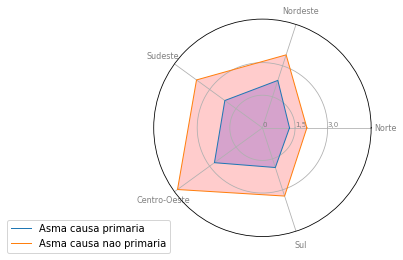

In [130]:

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,1.5,3], ["0","1,5","3,0"], color="grey", size=7)
plt.ylim(0,5)

# plot 01 - asma como causa primaria
ax.plot(angles,propOB100 , linewidth=1, linestyle='solid',label="Asma causa primaria")
ax.fill(angles, propOB100, 'b', alpha=0.2)


# plot 01 - asma como causa listada
ax.plot(angles,propOBAlsoAsma100 , linewidth=1, linestyle='solid',label="Asma causa nao primaria")
ax.fill(angles, propOBAlsoAsma100, 'r', alpha=0.2)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig('spider01.png',dpi=192)